<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-Python/blob/main/metodo_euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Método de Euler

Autor: Biología de sistemas

Feach: 15 de diciembre del 2020

### Problem #2

We are performing a chemical reaction as follows:

***Reaction 1:*** $A + B \rightarrow C$

***Reaction 2:*** $B + C \rightarrow D$

Product $C$ is desired, but as soon as some $C$ is formed, some $B$ reacts with it to form an undesired product $D$.

The rate of change of the concentrations of each of the species is given by

$\frac{dA}{dt} = -k_1 \, A \, B$

$\frac{dB}{dt} = -k_1 \, A \, B - k_2 \, B \, C$

$\frac{dC}{dt} = k_1 \, A \, B – k_2 \, B \, C$

$\frac{dD}{dt} = k_2 \, B \, C$

The symbols $A$, $B$, $C$, and $D$ are the species concentrations in $mol/L$.  The initial concentrations are $A_0$=1, $B_0$=1, $C_0$=0, $D_0$=0.  Also, $k_1$ = 1 L/mol-s, and $k_2$ = 1.5 L/mol-s.

***Action 2a:*** Solve for the concentrations of $A$, $B$, $C$, and $D$ as functions of time. Use a time step size of $\Delta t$=0.2 s and solve to a final time of $t$=3 s. Use Euler's equation applied to each species with $dy/dt = f(y,t)$ translated to $y_{n+1} = y_n + \Delta t \, f(y_n)$.

Impotar librerías 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Establecer parámetros 

In [16]:
k1 = 1
k2 = 1.5
tf = 3.0
dt = 0.2

Tiempo de simulación 

In [22]:
t = np.arange(0,tf +0.01, dt)
n = len(t)

Vectores para guardar las concentraciones 

In [26]:
Ca = np.ones(n)
Cb = np.ones(n)
Cc = np.zeros(n)
Cd = np.zeros(n)

Método de Euler

$$ \vec{x}_{i+1} = \vec{x}_{i} + F(\vec{x}_{i}, \vec{p}) * \Delta t $$

In [27]:
for i in range(1,n):

  r1 = k1*Ca[i-1]*Cb[i-1]
  r2 = k2*Cb[i-1]*Cc[i-1]

  Ca[i] = Ca[i-1] - r1*dt 
  Cb[i] = Cb[i-1] - (r1 + r2)*dt
  Cc[i] = Cc[i-1] + (r1 - r2)*dt
  Cd[i] = Cd[i-1] + r2*dt


Graficar resultados 

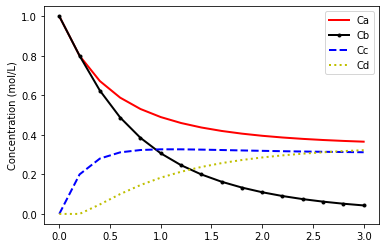

In [29]:
plt.plot(t,Ca,"r-",label = "Ca", linewidth = 2.0)
plt.plot(t, Cb,"k.-",label = "Cb", linewidth = 2.0)
plt.plot(t,Cc,"b--",label="Cc", linewidth = 2.0)
plt.plot(t,Cd,"y:",label="Cd", linewidth = 2.0)
plt.ylabel("Concentration (mol/L)")
plt.legend(loc = "best")

Solo para comparar, repitamos el proceso con un integrador 

Establecer modelo 

In [36]:
def model(s,t,p):

  # Variables
  Ca,Cb,Cc,Cd = s

  # Parámetros
  k1 = p[0]
  k2 = p[1]

  # Velocidades de reacción
  r1 = k1*Ca*Cb
  r2 = k2*Cb*Cc

  # Balances de materia
  dCa = - r1
  dCb = - r1 - r2
  dCc = r1 - r2 
  dCd = r2

  return [dCa, dCb, dCc, dCd]


Establecer valor de parámetros 

In [33]:
k1 = 1
k2 = 1.5
p = [k1, k2]

Condiciones iniciales 

In [34]:
s = [1,1,0,0]

Resolver EDOs

In [38]:
out = odeint(model, s, t, args=(p,))
Ca = out[:,0]
Cb = out[:,1]
Cc = out[:,2]
Cd = out[:,3]

Mostrar resultados 

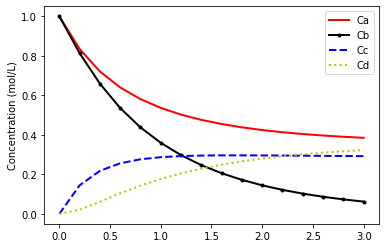

In [39]:
plt.plot(t,Ca,"r-",label = "Ca", linewidth = 2.0)
plt.plot(t, Cb,"k.-",label = "Cb", linewidth = 2.0)
plt.plot(t,Cc,"b--",label="Cc", linewidth = 2.0)
plt.plot(t,Cd,"y:",label="Cd", linewidth = 2.0)
plt.ylabel("Concentration (mol/L)")
plt.legend(loc = "best")